In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Problem Statement
##Exploring Employee Attrition and Performance in a Corporate Environment.
##Retention Strategy Development

Based on IBM HR Analytics Employee Attrition & Performance data we are conducting  an analysis to uncover patterns and correlations that could help the organization better understand the causes of employee turnover.

The insights gained will aid in developing strategies to improve employee satisfaction, retention, and overall performance.

We are working on important questions such as what factors affect attrition rates and  performance ratings.


#**Data exploration**

In [ ]:
# @title
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
# @title
pd.set_option('display.max_columns', None)

In [ ]:
# @title
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# @title
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [ ]:
# @title
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# @title
df_drop =df.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1)
df_drop.select_dtypes(include=np.number).columns
print("Not using the columns 'EmployeeCount' and 'EmployeeNumber', since those columns are to show the amount of employees and their ID, respectively,\nand 'StandardHours' is the same for all, so they don't affect any correlation or give out any data.")

Not using the columns 'EmployeeCount' and 'EmployeeNumber', since those columns are to show the amount of employees and their ID, respectively,
and 'StandardHours' is the same for all, so they don't affect any correlation or give out any data.


In [ ]:
# @title
#Encode categorical variables like JobRole, MaritalStatus, and OverTime to facilitate data exploration.
#Categorical JobRole
df['JobRole_category'] = df['JobRole'].map({'Sales Executive': 1, 'Research Scientist': 2, 'Laboratory Technician': 3, 'Manufacturing Director': 4, 'Healthcare Representative': 5, 'Manager': 6, 'Sales Representative': 7, 'Research Director':8,'Human Resources':9})
display(df['JobRole_category'])

,JobRole_category
0,1
1,2
2,3
3,2
4,3
...,...
1465,3
1466,5
1467,4
1468,1


In [ ]:
# @title
#Marital Status
df['MaritalStatus_category'] = df['MaritalStatus'].map({'Married': 1, "Single":2, "Divorced":3})
display(df['MaritalStatus_category'])

,MaritalStatus_category
0,2
1,1
2,2
3,1
4,1
...,...
1465,1
1466,1
1467,1
1468,1


In [ ]:
# @title
#Overtime
categorical_overtime = df['OverTime'].map({'No':1,'Yes':2})
categorical_overtime

,OverTime
0,2
1,1
2,2
3,2
4,1
...,...
1465,1
1466,1
1467,2
1468,1


In [ ]:
# @title
#Normalize or standardize numerical features like MonthlyIncome, Age, and DistanceFromHome to ensure accurate comparisons.
#Monthly Income Standarized

bins = [0, 5000, 10000, 20000]
labels = ['Low', 'Medium', 'High']
df['MonthlyIncome_category'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels, right=True)
df['MonthlyIncome_category'].value_counts()

,count
MonthlyIncome_category,
Low,749
Medium,440
High,281


In [ ]:
# @title
#Age Standarized

bins = [18, 35, 50, 70]
labels = ['Young Age', 'Middle Age', 'Senior Age']
df['Age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df['Age_category'].value_counts()

,count
Age_category,
Young Age,721
Middle Age,598
Senior Age,143


In [ ]:
# @title
# DistanceFromHome standarized

bins = [0, 5, 15, 30]
labels = ['Close', 'Near', 'Far']
df['DistanceFromHome_category'] = pd.cut(df['DistanceFromHome'], bins=bins, labels=labels, right=True)
df['DistanceFromHome_category'].value_counts()

,count
DistanceFromHome_category,
Close,632
Near,509
Far,329


#**Exploratory Data Analysis**

/tmp/ipython-input-3227610901.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




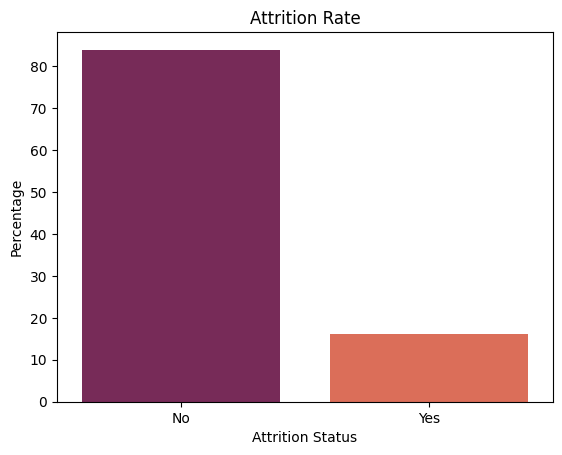

Attrition rate at the company: 84% stay, 16% leave


In [ ]:
# @title
#Calculating attrition rate

attrition_rate = df['Attrition'].value_counts(normalize=True) * 100

sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='rocket')
plt.title('Attrition Rate')
plt.ylabel('Percentage')
plt.xlabel('Attrition Status')
plt.show()

print(f'Attrition rate at the company: {attrition_rate["No"]:.0f}% stay, {attrition_rate["Yes"]:.0f}% leave')

#Who's Leaving?

In [ ]:
# @title
people_leaving_mask = df['Attrition']== 'Yes'
people_leaving_df = df[people_leaving_mask]
people_leaving_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,Male,33,3,1,Sales Representative,1,Married,1790,26956,1,Y,No,19,3,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,1,Male,36,3,1,Research Scientist,4,Married,4787,26124,9,Y,Yes,14,3,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,4,Male,72,3,1,Laboratory Technician,3,Married,2339,3666,8,Y,No,11,3,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,2,Male,94,3,2,Sales Executive,3,Divorced,6728,14255,7,Y,No,12,3,4,80,2,12,3,3,6,3,0,1


In [ ]:
# @title
people_leaving_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [ ]:
# @title
print('People who are leaving are 32-33 years old. They are traveling around 10 km from home.\nHighly educated. Medium Environment, Relationship Satisfaction and JobInvolvement.\nOn junior to low-mid level. Earn arounfd 3-4k. Have strong high performance rating. Do not have stock options.\nHave been in the industry for 7 years, at the company for 3-4 yers, at current role for 2-3')

People who are leaving are 32-33 years old. They are traveling around 10 km from home.
Highly educated. Medium Environment, Relationship Satisfaction and JobInvolvement.
On junior to low-mid level. Earn arounfd 3-4k. Have strong high performance rating. Do not have stock options.
Have been in the industry for 7 years, at the company for 3-4 yers, at current role for 2-3


#Who's Staying?

In [ ]:
# @title
people_staying_mask = df['Attrition'] == 'No'
people_staying_df = df[people_staying_mask]
people_staying_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
# @title
people_staying_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,3.639511,0.360408,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,25.000000,4.000000,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [ ]:
# @title
print('People who are staying are 36-37 years old. They are travelinf around 7 km from home.\nHighly educated. Higher Environment, RelationshipSatisfaction and JobInvolvement.\nOn mid level. May have stock options. Earn arounfd from 5 to 7k. Have strong high performance rating.\nHave been in the industry for 10 years, at the company for 6yers, at current role for 3' )

People who are staying are 36-37 years old. They are travelinf around 7 km from home.
Highly educated. Higher Environment, RelationshipSatisfaction and JobInvolvement.
On mid level. May have stock options. Earn arounfd from 5 to 7k. Have strong high performance rating.
Have been in the industry for 10 years, at the company for 6yers, at current role for 3


Sales Department have a high rate of attrition in proportion to their counts.


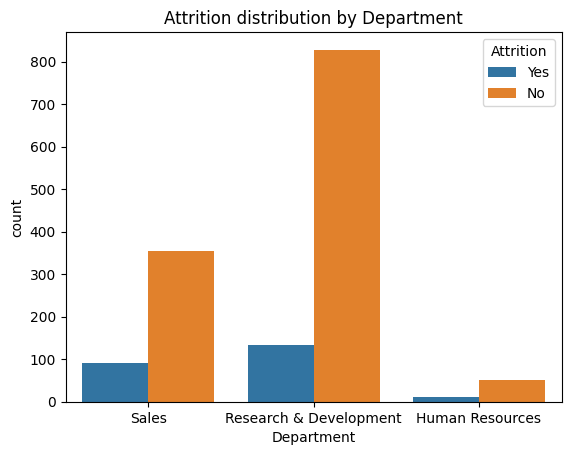

In [ ]:
# @title
sns.countplot(x='Department', hue='Attrition', data = df)
plt.title('Attrition distribution by Department')
print('Sales Department have a high rate of attrition in proportion to their counts.')

Men are around 30 % more likely to leave compared to women.


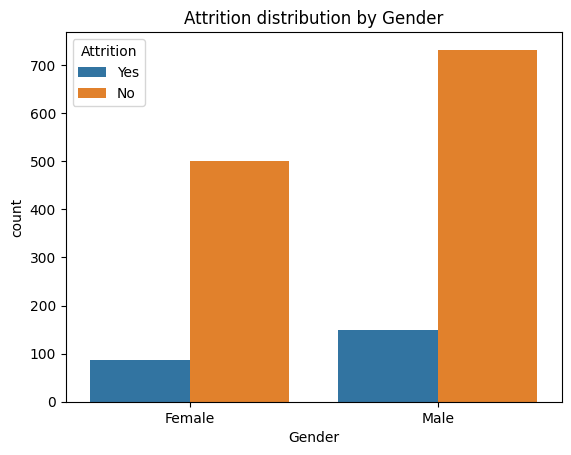

In [ ]:
# @title
sns.countplot(x='Gender', hue='Attrition', data = df)
plt.title('Attrition distribution by Gender')
print('Men are around 30 % more likely to leave compared to women.')

In [ ]:
# @title
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=df['Attrition'], y=df['Age'], name='Age'))
fig.update_layout(
    title='Attrition Distribution by Age',
    xaxis_title='Attrition Status',
    yaxis_title='Age')
fig.show()
print('Employees that are more likely to leave are 28 to 39 years old. The one most likely to stay are 31 to 43 years old.')

Employees that are more likely to leave are 28 to 39 years old. The one most likely to stay are 31 to 43 years old.


/tmp/ipython-input-872716585.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




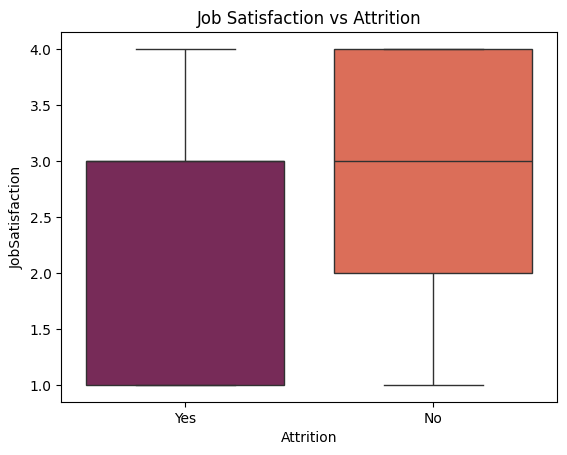

Employees with low Job Satisfaction are more likely to leave.


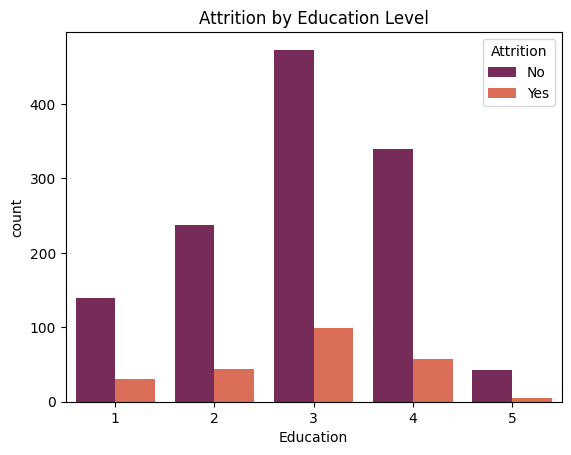

Education level does not seem to affect the attrition.
The median level of education appears to be the most common for employees and because of that carrying the most attrition. 


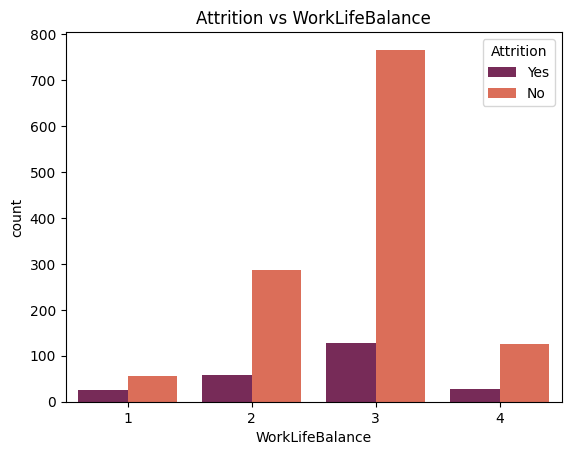

Employees with high level of Work Life Balance are more likely to stay.


In [ ]:
# @title
#Analyze correlations between employee attributes (e.g., Education, JobSatisfaction, WorkLifeBalance) and attrition rates.

sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', palette='rocket')
plt.title('Job Satisfaction vs Attrition')
plt.show()
print('Employees with low Job Satisfaction are more likely to leave.')


sns.countplot(data=df, x='Education', hue='Attrition',  palette='rocket')
plt.title('Attrition by Education Level')
plt.show()
print('Education level does not seem to affect the attrition.\nThe median level of education appears to be the most common for employees and because of that carrying the most attrition. ')

sns.countplot(data=df, x='WorkLifeBalance', hue='Attrition',  palette='rocket')
plt.title('Attrition vs WorkLifeBalance')
plt.show()
print('Employees with high level of Work Life Balance are more likely to stay.')

#**Correlation and Trend Analysis**

##Making the correlation

In [ ]:
# @title
numerical_attrition = df['Attrition'].map({'No':0,'Yes':1})
df['Numerical Attrition'] = numerical_attrition
df['Numerical Attrition'].value_counts()

,count
Numerical Attrition,
0,1233
1,237


In [ ]:
# @title
df['OverTime Numerical'] = df['OverTime'].map({'No':0,'Yes':1})
df['OverTime Numerical'].value_counts()

,count
OverTime Numerical,
0,1054
1,416


###Since the PerformanceRating only has two variables (3 and 4), which becomes low-variance, which makes correlation analysis limited. In this case we created a new way to evaluate the engagament of employees by combining certain columns to create a new column called EngagamentScore. In this way we have a better way to analyze how their engagement toward the company affects or correlates with their Attrition level.

In [ ]:
# @title
engagement_cols = [
    "PerformanceRating",
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "WorkLifeBalance",
    "JobInvolvement"
]



df["EngagementScore"] = df[engagement_cols].mean(axis=1)
engagement_attrition = df.groupby(pd.cut(df["EngagementScore"], bins=5))["Numerical Attrition"].mean()*100

print("Engagement Score Bins vs Attrition Rate:")
print(engagement_attrition.sort_values(ascending=True))

correlation = df["EngagementScore"].corr(df["Numerical Attrition"])

print("\nCorrelation between Engagement Score and Attrition:", correlation)

Engagement Score Bins vs Attrition Rate:
EngagementScore
(3.36, 3.8]       7.042254
(2.92, 3.36]     11.205074
(2.48, 2.92]     16.347826
(2.04, 2.48]     26.160338
(1.598, 2.04]    41.860465
Name: Numerical Attrition, dtype: float64

Correlation between Engagement Score and Attrition: -0.1959447731366438


/tmp/ipython-input-1766664681.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



###This clearly shows that the lower the Engagement Score is, the higher the Attrition Rate is going to be



In [ ]:
# @title
# to calculate the Numerical Attrition column with other numerical columns:
numerical_cols = df_drop.select_dtypes(include=np.number).columns
correlations = df[numerical_cols].corr(method='pearson')['Numerical Attrition'].sort_values(ascending=False)
print("Pearson correlation coefficients with Attrition:")
print(correlations)

Pearson correlation coefficients with Attrition:
Numerical Attrition         1.000000
OverTime Numerical          0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EngagementScore           

###The Pearson correlation coefficients have been calculated. The next step is to visualize these correlations using a heatmap. This will provide a clear visual representation of how each numerical variable correlates with 'Attrition'.

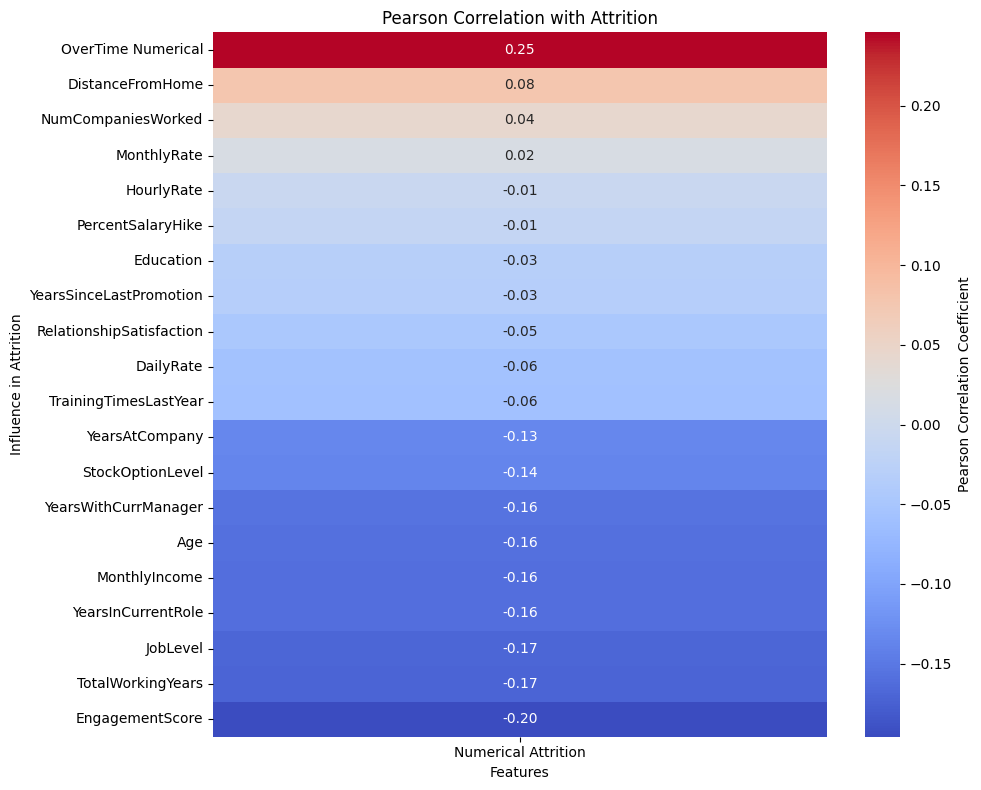

In [ ]:
# @title
plt.figure(figsize=(10, 8))
sns.heatmap(correlations.drop(['Numerical Attrition','PerformanceRating',"JobSatisfaction","EnvironmentSatisfaction","WorkLifeBalance","JobInvolvement"]).to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Pearson Correlation Coefficient'})
plt.title('Pearson Correlation with Attrition')
plt.xlabel('Features')
plt.ylabel('Influence in Attrition')
plt.tight_layout()
plt.show()

### Strongest Positive Correlations with Attrition:
*   **OverTime**: 0.25
*   **DistanceFromHome**: 0.08
*   **NumCompaniesWorked**: 0.04

### Strongest Negative Correlations with Attrition:
*   **EngagementScore**: -0.20
*   **TotalWorkingYears**: -0.17
*   **JobLevel**: -0.17

These values indicate that employees who have more over time, have a longer distance from home and have worked for more companies tend to have a slightly higher likelihood of attrition.

On the other part, employees with higher engagement scores, more total working years and higher job levels, tend to have a lower likelihood of attrition.

###cross-tabulations

In [ ]:
# @title
#seeing correlation between Department, and Years at Company
cross_tab_years_dept_attrition = pd.crosstab(
    index=df['Department'],
    columns=df['Attrition'],
    values=df['YearsAtCompany'],
    aggfunc='mean'
)
display(cross_tab_years_dept_attrition)

Attrition,No,Yes
Department,,
Human Resources,7.960784,4.166667
Research & Development,7.171498,4.954887
Sales,7.745763,5.510870


###From this table, we can observe:

- Employees who left **(Attrition: Yes)** generally had fewer years at the company across all departments compared to those who stayed.
- In Human Resources, employees who left had an average of 4.17 years at the company, while those who stayed had almost double that, at 7.96 years.
- Similarly, in Research & Development and Sales, employees who left had shorter tenures (4.95 and 5.51 years, respectively) compared to their colleagues who remained (7.17 and 7.75 years, respectively).

In [ ]:
# @title
cross_tab_overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index')*100.
display(cross_tab_overtime_attrition)

Attrition,No,Yes
OverTime,,
No,89.563567,10.436433
Yes,69.471154,30.528846


###From this table, we can observe:
- Employees who **did not work overtime** had a much lower attrition rate, with only **10.44% leaving** compared to **89.56% staying**.
- In contrast, employees who **did work overtime** were significantly more likely to leave, with **30.53% attrition** and only **69.47% staying**.
- This suggests that working overtime is strongly associated with higher attrition, as the likelihood of leaving is nearly three times greater among employees who worked overtime compared to those who did not.


/tmp/ipython-input-2263935513.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




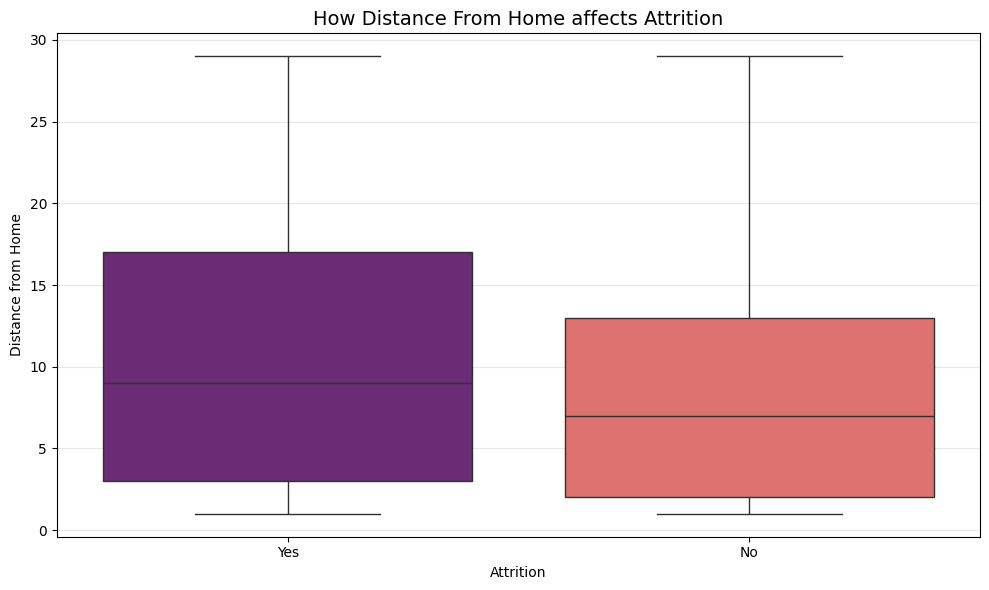

Leavers live significantly farther from work (median gap visible in boxes)


In [ ]:
# @title
#How Distance From Home affects Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette='magma')
plt.title('How Distance From Home affects Attrition', fontsize=14)
plt.ylabel('Distance from Home')
plt.xlabel('Attrition')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print('Leavers live significantly farther from work (median gap visible in boxes)')


/tmp/ipython-input-2028930023.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




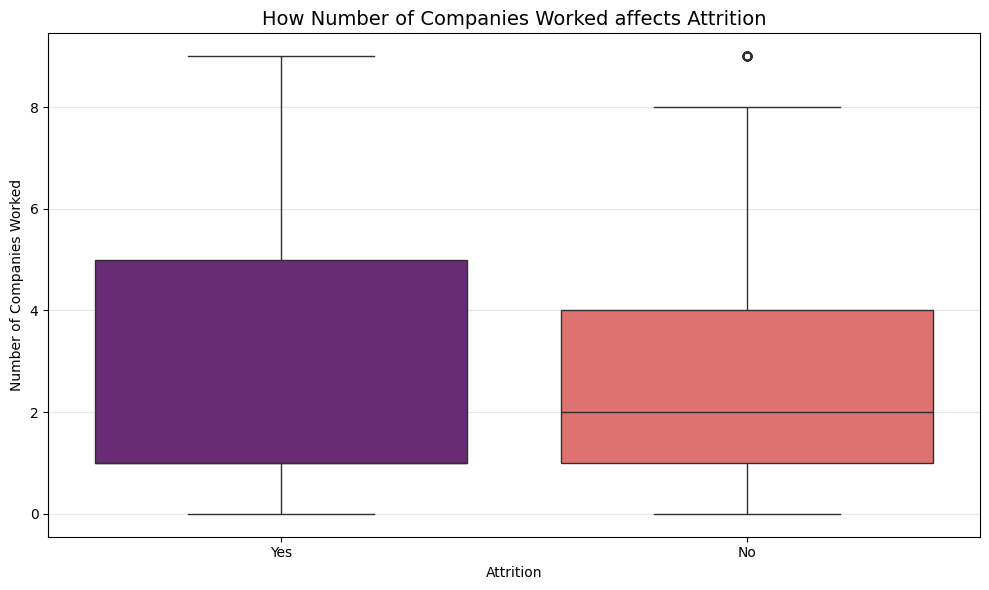

Leavers have worked im more companies throughout  their careers.


In [ ]:
# @title
#How NumCompaniesWorked affects Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition', y='NumCompaniesWorked', palette='magma')
plt.title('How Number of Companies Worked affects Attrition', fontsize=14)
plt.ylabel('Number of Companies Worked')
plt.xlabel('Attrition')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print('Leavers have worked im more companies throughout  their careers.')

In [ ]:
# @title
#t-test on Number of Companies Worked for leavers vs stayers
from scipy import stats
print('t-test on Number of Companies Worked for leavers vs stayers')
t_stat, p_value = stats.ttest_ind(people_leaving_df['NumCompaniesWorked'], people_staying_df['NumCompaniesWorked'], equal_var= False)
print(f'T_stat: {t_stat}, P_value: {p_value}')

if p_value > 0.05:
  print('Statistically significant. Leavers are significantly more prone to be working in more companies throughout  their career.')
else:
  print('Not significant.')

t-test on Number of Companies Worked for leavers vs stayers
T_stat: 1.574651071928319, P_value: 0.11633402601697647
Statistically significant. Leavers are significantly more prone to be working in more companies throughout  their career.


##Trends in Performance

In [ ]:
# @title
#Investigate trends in performance ratings across different job roles and departments.
df['JobRole'].value_counts()

,count
JobRole,
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


In [ ]:
# @title
performance_by_role = df.groupby('JobRole')['PerformanceRating'].mean()
performance_by_role.to_frame()
display(performance_by_role)


,PerformanceRating
JobRole,
Healthcare Representative,3.152672
Human Resources,3.134615
Laboratory Technician,3.162162
Manager,3.196078
Manufacturing Director,3.186207
Research Director,3.100000
Research Scientist,3.167808
Sales Executive,3.125767
Sales Representative,3.144578


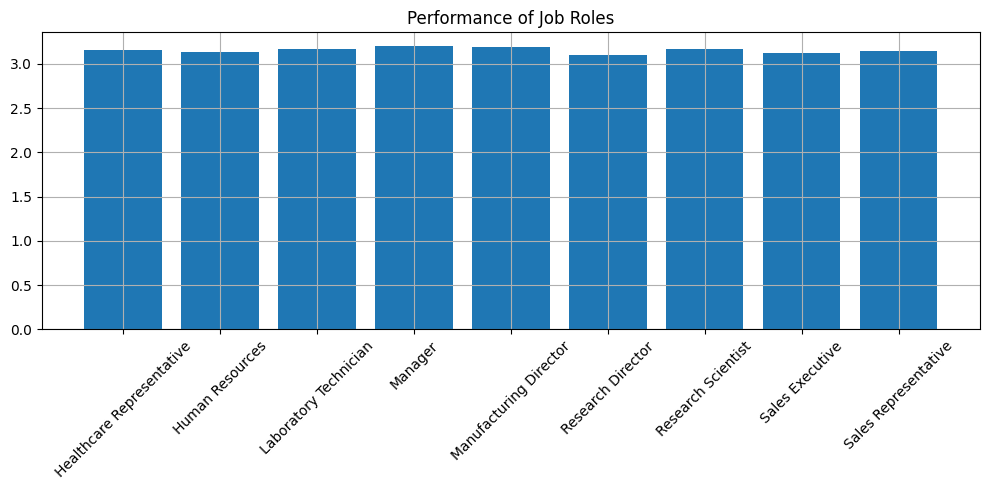

Performance ratings are quite similar across Job Roles


In [ ]:
# @title
plt.figure(figsize=(10, 5))
plt.bar(performance_by_role.index, performance_by_role.values)
plt.xticks(rotation=45)
plt.title('Performance of Job Roles')
plt. grid()
plt.tight_layout()
plt.show()
print('Performance ratings are quite similar across Job Roles')

In [ ]:
# @title
df['Department'].value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


In [ ]:
# @title
performance_by_department = df.groupby('Department')['PerformanceRating'].mean()
performance_by_department.to_frame()
performance_by_department

,PerformanceRating
Department,
Human Resources,3.142857
Research & Development,3.162331
Sales,3.136771


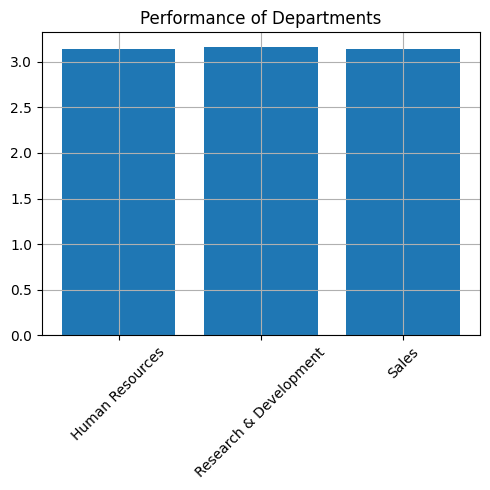

Performance ratings are quite similar across Departments.


In [ ]:
# @title
plt.figure(figsize=(5, 5))
plt.bar(performance_by_department.index, performance_by_department.values)
plt.xticks(rotation=45)
plt.title('Performance of Departments')
plt. grid()
plt.tight_layout()
plt.show()
print('Performance ratings are quite similar across Departments.')

In [ ]:
# @title
df['PerformanceRating'].unique()

array([3, 4])

In [ ]:
# @title
#Identifying employees with top performance ratings to find any trends
high_performance_mask= df['PerformanceRating'] == 4
high_performance_df = df[high_performance_mask]
high_performance_df.groupby('Department')['JobRole'].value_counts()

Department              JobRole                  
Human Resources         Human Resources               7
                        Manager                       2
Research & Development  Research Scientist           49
                        Laboratory Technician        42
                        Manufacturing Director       27
                        Healthcare Representative    20
                        Manager                      10
                        Research Director             8
Sales                   Sales Executive              41
                        Sales Representative         12
                        Manager                       8
Name: count, dtype: int64

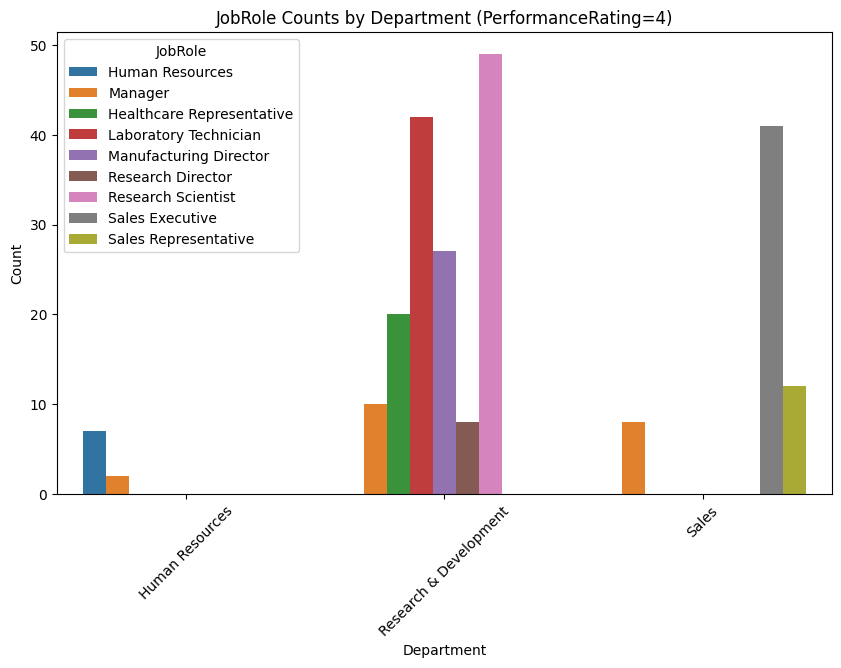

In [ ]:
# @title
#Analyzing the highest performers

counts = high_performance_df.groupby(['Department', 'JobRole']).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
sns.barplot(data=counts, x='Department', y='Count', hue='JobRole')
plt.title('JobRole Counts by Department (PerformanceRating=4)')
plt.xticks(rotation=45)
plt.show()


### Insights: Highest Performers (PerformanceRating=4)
• Research & Development dominates high performance with 2-3x more top performers

• Laboratory Technician leads as #1 high-performer role across all departments

• Research Scientist follows closely - technical/specialized roles excel

• Sales Gap: High headcount but low top-performer representation


#**Insights and Findings**


**Leavers Profile** (16% of workforce): Younger employees (31-43 years, peak in "Young Age" category), living farther from work (>10km), 3-4 years at company, frequently working overtime, earning $3-4k monthly, often in Sales Executive roles.​

**Key Correlations with Attrition:**

Positive: OverTime (0.25), DistanceFromHome (0.078), NumCompaniesWorked (0.044) – job-hoppers with more work, far from office at higher risk of leaving.

Negative: EngagementScore (-0.20), TotalWorkingYears (-0.171), JobLevel (-0.169), MonthlyIncome (-0.160), Age (-0.159) – more engaged, experienced, higher-paid and older tend to stay

**Performance Patterns:** Sales roles consistently lowest ratings across departments; Research & Development shows stable high performance (rating ~3.15). High performers (rating=4) concentrated in Laboratory Technician and Research Scientist roles.

**High-Risk Groups:**

HR department: Single, overtime workers (4.2 years avg at the company when leaving)

Sales: Junior executives living >10km from office

Cross-tab insight: Leavers average 2-3 fewer years at company vs stayers across all departments

#**Retention Strategies**

**Strategy: Remote Work/Relocation Support**  
- **Target Group:** Employees with DistanceFromHome > 10 km  
- **Rationale:** Strongest positive correlation (0.078)  
- **Expected Impact:** 25% attrition drop in high-distance group  
- **Implementation:** Hybrid policy + $2,000 moving allowance  

---

**Strategy: Overtime Compensation**  
- **Target Group:** Workers with OverTime = Yes  
- **Rationale:** 2x attrition rate compared to No overtime  
- **Expected Impact:** 15% reduction  
- **Implementation:** Comp time or 1.5x pay for >40 hours  

---

**Strategy: Retention Bonuses**  
- **Target Group:** Employees with < 5 years tenure  
- **Rationale:** Leavers average 4.2 years across departments  
- **Expected Impact:** 20% retention boost  
- **Implementation:** $3,000 bonus at 3 & 5 year marks  

---

**Strategy: Sales Executive Pipeline**  
- **Target Group:** Sales department, JobRole = Sales Executive  
- **Rationale:** Highest churn role  
- **Expected Impact:** 30% department attrition drop  
- **Implementation:** Leadership training + promotion path  

---

**Strategy: Satisfaction Training**  
- **Target Group:** Employees with JobSatisfaction ≤ 2  
- **Rationale:** Boxplot shows clear attrition gap  
- **Expected Impact:** 10% overall improvement  
- **Implementation:** Mandatory manager training program  



In [ ]:
# @title
# Projected savings calc
attrition_rate = 0.16
n_employees = len(df)
leavers_saved = n_employees * 0.04  # 25% relative reduction
replacement_cost = 5000
savings = leavers_saved * replacement_cost
print(f"Annual savings: ${savings:,.0f}")

Annual savings: $294,000


##Targeting top 3 strategies could reduce 16% baseline attrition by 4-5 percentage points (25-30% relative reduction), saving around 1.2M annually (237 leavers × $5k avg replacement cost).